<a href="https://colab.research.google.com/github/iharoun/CIS2205/blob/main/49%25__01_01_2024_ASSIGNMENT2_2363712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Mount your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import required Libraries

In [22]:
# The OS Module
import os

# The global Module
import glob

# OpenCV2 Library
import cv2

# Numpy Library
import numpy as np

# Visualizing - Matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Predictions
from keras.preprocessing.image import save_img

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Creating a Convolutional Model
from tensorflow.keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras.layers import (Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,)

# Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## 1.1 Define your global variables

In [3]:
img_size = (150, 150,3)

sign_0 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage1/*.*')
sign_1 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage2/*.*')
sign_2 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage3/*.*')
sign_3 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage4/*.*')
sign_4 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage5/*.*')
sign_5 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage6/*.*')
sign_6 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage7/*.*')
sign_7 = glob.glob('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage8/*.*')

data = []
labels = []

## 2. Data Labelling Errors

>1. Explain what kind of errors you found in the dataset.
>2. List the total number of images left in each class/stage after the label error handling

>+ **Stage 1:** 280 Images</li>
>+ **Stage 2:** 236 Images</li>
>+ **Stage 3:** 257 Images </li>
>+ **Stage 4:** 219 Images</li>
>+ **Stage 5:** 257 Images</li>
>+ **Stage 6:** 276 Images</li>
>+ **Stage 7:** 253 Images</li>
>+ **Stage 8:** 266 Images</li>


### The following errors found in the dataset.
* Wrong dataset size (not 150x150)
* Noisy dataset (e.g. not at sink, contens accessories)
* Dataset with soap on hand
* incorrect angle for hand washing
* Cropped images dataset
* Blurry images.
> Total images removed are: 3,291

## 3. Loading the Data

In [4]:

for i in sign_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(0)

for i in sign_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(1)

for i in sign_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(2)

for i in sign_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(3)

for i in sign_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(4)

for i in sign_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(5)

for i in sign_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(6)

for i in sign_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(7)


data = np.array(data)
labels = np.array(labels)


## 4. Split the data
<br>

Split the data into training, validation and testing dataset using Startification, ensuring equal class distribution.

Choose appropriate values of training, validation and testing datasets.

Display total number of images in each dataset.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

print("Total training intences: " + str(len(y_train)))
print("Train Data:" + str(np.unique(y_train, return_counts=True)))
print("Total Validation intences: " + str(len(y_val)))
print("Validation Data:" + str(np.unique(y_val, return_counts=True)))
print("Total testing intences: " + str(len(y_test)))
print("Test Data:" + str(np.unique(y_test, return_counts=True)))

Total training intences: 960
Train Data:(array([0, 1, 2, 3, 4, 5, 6, 7]), array([131, 104, 118, 104, 132, 137, 108, 126]))
Total Validation intences: 412
Validation Data:(array([0, 1, 2, 3, 4, 5, 6, 7]), array([60, 56, 49, 42, 43, 55, 49, 58]))
Total testing intences: 589
Test Data:(array([0, 1, 2, 3, 4, 5, 6, 7]), array([74, 67, 77, 62, 69, 79, 85, 76]))


## 5. Pre-process Dataset

In [6]:
print("\n\nBefore Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 150, 150, 3))
X_val = X_val.reshape((X_val.shape[0], 150, 150, 3))
X_test = X_test.reshape((X_test.shape[0], 150, 150, 3))
print("After Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



Before Reshaping the shape of train and test dataset:
(960, 150, 150, 3)
(412, 150, 150, 3)
(589, 150, 150, 3)
After Reshaping the shape of train and test dataset:
(960, 150, 150, 3)
(412, 150, 150, 3)
(589, 150, 150, 3)


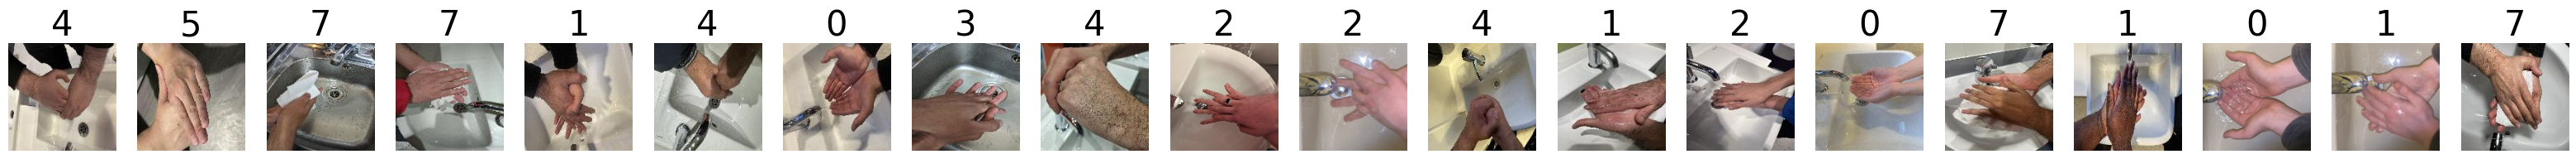

In [7]:
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = X_train[i]
    label = y_train[i]

    image = row
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [8]:
# Convert the array to float32 as opposed to uint8
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
X_train /= 255
X_val /= 255
X_test /=  255

In [9]:
NUM_CLASSES = 10

print("Before label conversion to categorical: ", y_train[0:5]) # The format of the labels before conversion
y_train  = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)

print("Before label conversion to categorical: ", y_val[0:5]) # The format of the labels before conversion
y_val  = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)

print("After label conversion to categorical: ", y_train[0:5]) # The format of the labels after conversion
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

Before label conversion to categorical:  [4 5 7 7 1]
Before label conversion to categorical:  [4 5 4 1 4]
After label conversion to categorical:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 6. Creating a Convolutional Neural Network Model

In [10]:
#Create a sequential model
model = Sequential()

#Convolutional layer 1
model.add(Conv2D(64, (12, 12), strides=1, padding="same", activation="relu", input_shape=img_size))
model.add(MaxPool2D((4, 4), strides=2, padding="same"))

#Convolutional layer 2
model.add(Conv2D(32, (9, 9), strides=1, padding="same", activation="relu", input_shape=img_size))
model.add(MaxPool2D((3, 3), strides=2, padding="same"))

#Convolutional layer 3
model.add(Conv2D(16, (6, 6), strides=1, padding="same", activation="relu", input_shape=img_size))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

#Convolutional layer 4
model.add(Conv2D(8, (3, 3), strides=1, padding="same", activation="relu", input_shape=img_size))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

#Flatten the output before the dense layers
model.add(Flatten())

#Dense layer 1 with tanh activation and L2 regularization
model.add(Dense(units=512, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

#Dense layer 2 with tanh activation and L2 regularization
model.add(Dense(units=256, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dense(units=NUM_CLASSES, activation="softmax"))

## 7. Data Augmentation

In [11]:
datagen = ImageDataGenerator(
    #Randomly rotate images in the range (degrees, 0 to 180)
  rotation_range=0,

    #Randomly zoom image
    zoom_range=0.1,

    #Randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,

    #Randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,

    #Randomly flip images horizontally
    horizontal_flip=True,

    #Don't randomly flip images vertically
    vertical_flip=False,
)

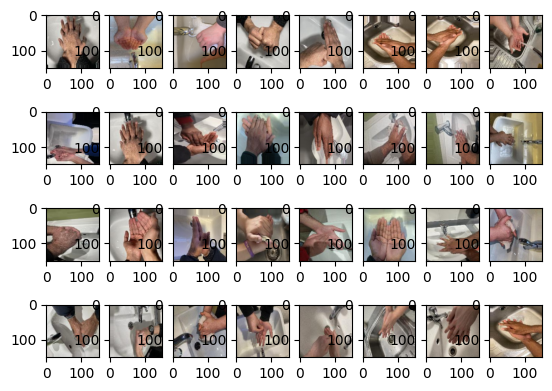

In [12]:
batch_size = 32
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [13]:
datagen.fit(X_train)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      27712     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        165920    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 16)        18448     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 16)        0

## 8. Train Model

In [15]:
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

In [16]:
history = model.fit(img_iter, epochs=50, steps_per_epoch=len(X_train)/batch_size, validation_data=(X_val, y_val))

Epoch 1/50
30/30 [==============================] - 19s 303ms/step - loss: 3.4483 - accuracy: 0.1302 - val_loss: 3.0681 - val_accuracy: 0.1481
Epoch 2/50
30/30 [==============================] - 5s 177ms/step - loss: 3.0401 - accuracy: 0.1625 - val_loss: 2.9240 - val_accuracy: 0.1505
Epoch 3/50
30/30 [==============================] - 6s 183ms/step - loss: 2.8767 - accuracy: 0.1958 - val_loss: 2.7935 - val_accuracy: 0.1723
Epoch 4/50
30/30 [==============================] - 7s 222ms/step - loss: 2.7362 - accuracy: 0.2073 - val_loss: 2.6642 - val_accuracy: 0.2160
Epoch 5/50
30/30 [==============================] - 5s 170ms/step - loss: 2.6219 - accuracy: 0.2313 - val_loss: 2.5914 - val_accuracy: 0.2476
Epoch 6/50
30/30 [==============================] - 5s 176ms/step - loss: 2.5559 - accuracy: 0.2427 - val_loss: 2.5147 - val_accuracy: 0.2306
Epoch 7/50
30/30 [==============================] - 8s 252ms/step - loss: 2.4659 - accuracy: 0.2344 - val_loss: 2.4481 - val_accuracy: 0.2743
Epoch

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy))

19/19 [==============================] - 1s 47ms/step - loss: 1.7964 - accuracy: 0.5144
Test accuracy: 0.51


## 9. Evaluate the Model

In [18]:
#### testing model on unseen test images
y_pred = model.predict(X_test)
#Convert class attribute back to its origional form, 0,1 from categorical [1. 0., 0. 1.]
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

#Accuracy of the model on test dataset
print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

19/19 [==============================] - 0s 18ms/step
[4 6 4 3 6 3 4 0 1 5 1 7 4 3 7 7 5 5 7 4 5 2 7 3 7]
[4 7 4 4 6 3 7 2 0 5 1 7 4 3 7 7 4 5 2 3 5 2 2 3 7]
              precision    recall  f1-score   support

           0       0.80      0.54      0.65        74
           1       0.53      0.39      0.45        67
           2       0.43      0.52      0.47        77
           3       0.34      0.53      0.42        62
           4       0.52      0.67      0.59        69
           5       0.53      0.53      0.53        79
           6       0.52      0.46      0.49        85
           7       0.63      0.49      0.55        76

    accuracy                           0.51       589
   macro avg       0.54      0.52      0.52       589
weighted avg       0.54      0.51      0.52       589

[[40  5 14  9  0  0  3  3]
 [ 1 26 14  9  3  4  8  2]
 [ 5  4 40 23  3  1  0  1]
 [ 1  3  5 33  6  5  5  4]
 [ 2  2  0  4 46  7  5  3]
 [ 0  2  3  5  9 42 13  5]
 [ 1  3  8 11  9 10 39  4]
 [

## 10. Training Curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


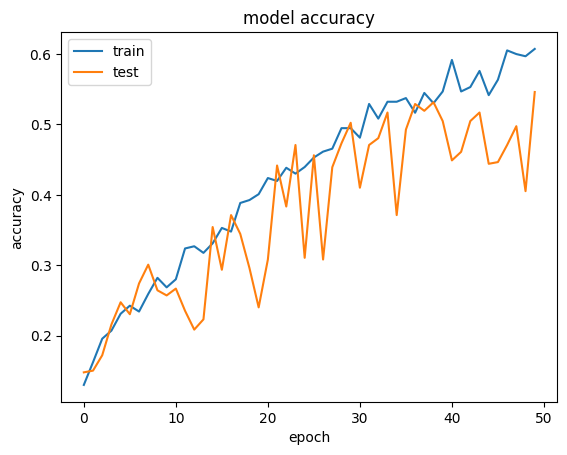

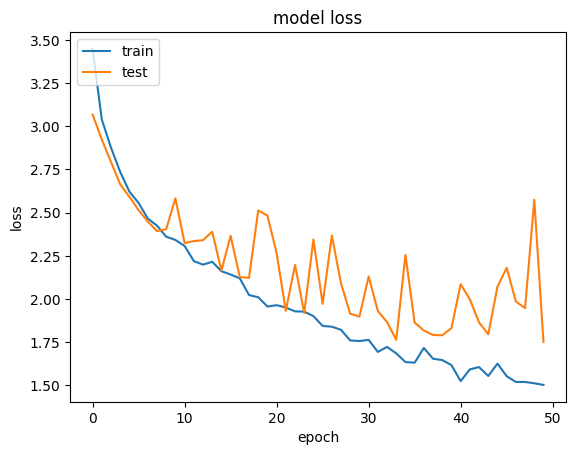

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label ="Validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label ="Validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 11. Make some pridiction using the trained Model

In [20]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=img_size)
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(index).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 0s 264ms/step


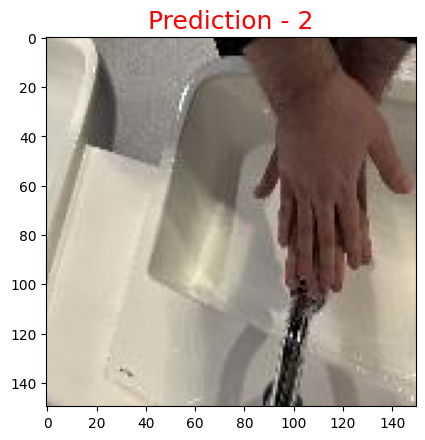

In [23]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Assessment_2/Stage3/10_Stage_3_u2062278.jpg', model)

In [24]:

import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}